In [5]:

!pip install pyLDAvis 


   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ------------------------ --------------- 1.6/2.6 MB 5.6 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 6.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.2 MB/s eta 0:00:00


In [7]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Arif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Sample documents
documents = [
    "Apple is looking at buying U.K. startup for $1 billion",
    "Autonomous cars shift insurance liability toward manufacturers",
    "San Francisco considers banning sidewalk delivery robots",
    "London is a very busy city, especially in summer",
    "The company reported a profit for the first quarter",
    "Google, Facebook, and Amazon are moving into the cloud computing business"
]


In [11]:
# Stop words for English language
stop_words = stopwords.words('english')

# Tokenize the documents and remove stopwords
texts = [[word for word in document.lower().split() if word not in stop_words]
         for document in documents]

print("Tokenized Texts: ", texts)


Tokenized Texts:  [['apple', 'looking', 'buying', 'u.k.', 'startup', '$1', 'billion'], ['autonomous', 'cars', 'shift', 'insurance', 'liability', 'toward', 'manufacturers'], ['san', 'francisco', 'considers', 'banning', 'sidewalk', 'delivery', 'robots'], ['london', 'busy', 'city,', 'especially', 'summer'], ['company', 'reported', 'profit', 'first', 'quarter'], ['google,', 'facebook,', 'amazon', 'moving', 'cloud', 'computing', 'business']]


In [13]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert the document into a bag-of-words format (each word is represented as a number)
corpus = [dictionary.doc2bow(text) for text in texts]

print("Corpus: ", corpus)


Corpus:  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]]


In [15]:
# Build LDA model
lda_model = LdaModel(corpus=corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")


Topic 0: 0.068*"shift" + 0.068*"manufacturers" + 0.068*"toward" + 0.068*"autonomous" + 0.068*"insurance" + 0.068*"cars" + 0.068*"liability" + 0.017*"first" + 0.017*"busy" + 0.017*"city,"
Topic 1: 0.026*"reported" + 0.026*"busy" + 0.026*"company" + 0.026*"london" + 0.026*"first" + 0.026*"especially" + 0.026*"quarter" + 0.026*"summer" + 0.026*"city," + 0.026*"profit"
Topic 2: 0.031*"delivery" + 0.031*"buying" + 0.031*"u.k." + 0.031*"banning" + 0.031*"billion" + 0.031*"considers" + 0.031*"francisco" + 0.031*"facebook," + 0.031*"sidewalk" + 0.031*"cloud"


### Prepare visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


In [18]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


Coherence Score: 0.41772327581130025


In [26]:
#using dataset
import re

In [65]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(subset='all', categories=['sci.space', 'rec.sport.baseball'],
                             remove=('headers', 'footers', 'quotes'))
documents = dataset.data


In [66]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Remove punctuation, numbers, and extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase and tokenize the text
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

texts = [preprocess(doc) for doc in documents]


In [67]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extreme cases (words too rare or too frequent)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert dictionary to a corpus: list of (word_id, frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts]


In [68]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)


In [69]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.021*"space" + 0.008*"launch" + 0.006*"satellite" + 0.006*"nasa" + 0.005*"system" + 0.005*"solar" + 0.005*"first" + 0.004*"also" + 0.004*"earth" + 0.004*"new"')
(1, '0.009*"year" + 0.009*"would" + 0.008*"game" + 0.007*"one" + 0.006*"think" + 0.006*"team" + 0.006*"last" + 0.006*"good" + 0.006*"dont" + 0.005*"well"')
(2, '0.008*"one" + 0.006*"data" + 0.005*"like" + 0.005*"time" + 0.005*"would" + 0.004*"get" + 0.004*"spacecraft" + 0.004*"venus" + 0.004*"also" + 0.004*"may"')
(3, '0.015*"would" + 0.009*"space" + 0.007*"could" + 0.007*"like" + 0.005*"one" + 0.005*"much" + 0.005*"think" + 0.005*"shuttle" + 0.005*"dont" + 0.005*"get"')
(4, '0.007*"get" + 0.006*"dont" + 0.006*"know" + 0.006*"space" + 0.006*"please" + 0.005*"one" + 0.005*"im" + 0.005*"would" + 0.005*"email" + 0.005*"us"')


In [72]:
(0, '0.050*"space" + 0.045*"nasa" + 0.030*"rocket" + 0.025*"launch" + 0.020*"orbit"')
(1, '0.070*"game" + 0.065*"team" + 0.060*"season" + 0.045*"player" + 0.030*"league"')


(1,
 '0.070*"game" + 0.065*"team" + 0.060*"season" + 0.045*"player" + 0.030*"league"')

In [74]:
for i, doc in enumerate(corpus[:5]):
    print(f"Document {i+1}:")
    topics_per_doc = lda_model.get_document_topics(doc)
    print(topics_per_doc)


Document 1:
[(1, 0.99354786)]
Document 2:
[(1, 0.9644172)]
Document 3:
[(1, 0.8402689), (4, 0.15378328)]
Document 4:
[(1, 0.9905753)]
Document 5:
[(1, 0.99400276)]


In [75]:
# Suppose you want to print topics for each document
for i, doc in enumerate(documents):  # Assuming documents is a list of documents
    print(f"Document {i+1}:")
    # Process the document, e.g., print its topic distribution
    print(lda_model.get_document_topics(corpus[i]))  # Assuming corpus[i] is the document in bag-of-words format
    print("\n")  # To add spacing between documents


Document 1:
[(1, 0.99354744)]


Document 2:
[(1, 0.9644152)]


Document 3:
[(1, 0.8402565), (4, 0.15379564)]


Document 4:
[(1, 0.9905753)]


Document 5:
[(1, 0.99400455)]


Document 6:
[(1, 0.25104123), (3, 0.7309093)]


Document 7:
[(0, 0.028697487), (1, 0.8844939), (2, 0.028683553), (3, 0.028679058), (4, 0.029446)]


Document 8:
[(1, 0.12031884), (3, 0.865349)]


Document 9:
[(1, 0.99318033)]


Document 10:
[(0, 0.159871), (3, 0.834021)]


Document 11:
[(0, 0.013430562), (1, 0.7774008), (2, 0.013416753), (3, 0.013436816), (4, 0.18231513)]


Document 12:
[(1, 0.5141651), (3, 0.48086536)]


Document 13:
[(3, 0.990807)]


Document 14:
[(3, 0.99456704)]


Document 15:
[(1, 0.9886142)]


Document 16:
[(1, 0.9331582), (2, 0.047741104)]


Document 17:
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]


Document 18:
[(3, 0.99505514)]


Document 19:
[(1, 0.9615752)]


Document 20:
[(1, 0.9625471), (4, 0.032402534)]


Document 21:
[(0, 0.020212611), (1, 0.32335305), (2, 0.02033855), (3, 0.02

In [76]:
#### import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


In [54]:
#Code Example: Using Both WordCloud and Gensim
#WordCloud Example (with Bigrams and Trigrams):
!pip install wordcloud

C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


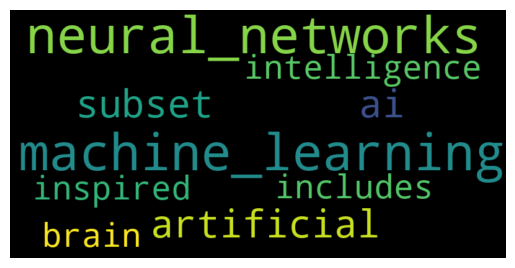

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Sample data
documents = ["Machine learning is a subset of AI", 
             "Artificial intelligence includes machine learning and neural networks", 
             "Neural networks are inspired by the brain"]

# Tokenization and Stopword removal
stop_words = set(stopwords.words('english'))
def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

texts = [preprocess(doc) for doc in documents]

# Create bigrams and trigrams
bigram = Phrases(texts, min_count=1, threshold=2)
trigram = Phrases(bigram[texts], threshold=2)

bigram_mod = bigram[texts]
trigram_mod = trigram[bigram_mod]

# Join tokens for WordCloud input
texts_joined = [' '.join(text) for text in trigram_mod]

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(texts_joined))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [58]:
from gensim import corpora
from gensim.models import LdaModel

# Create Dictionary
dictionary = corpora.Dictionary(trigram_mod)

# Create Corpus: Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in trigram_mod]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=10)

# Print topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.161*"neural_networks" + 0.161*"machine_learning" + 0.155*"intelligence" + 0.155*"artificial" + 0.155*"includes"')
(1, '0.143*"brain" + 0.143*"inspired" + 0.143*"subset" + 0.143*"ai" + 0.140*"machine_learning"')


In [63]:
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)
